In [ ]:
!nvidia-smi

Tue Nov  7 00:02:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
from google.colab import userdata
roboflow_key = userdata.get('roboflow_key')

rf = Roboflow(api_key=roboflow_key)
project = rf.workspace("scooters-kipjh").project("mopeds")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.134, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to mopeds-2 in yolov8:: 100%|██████████| 1404/1404 [00:00<00:00, 9449.33it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 225MB/s]
New https://pypi.org/project/ultralytics/8.0.207 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/mopeds-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, vis

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1698767879.a664f9191843.1444.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3240.jpg  weights
P_curve.png					    train_batch3241.jpg
PR_curve.png					    train_batch3242.jpg


/content


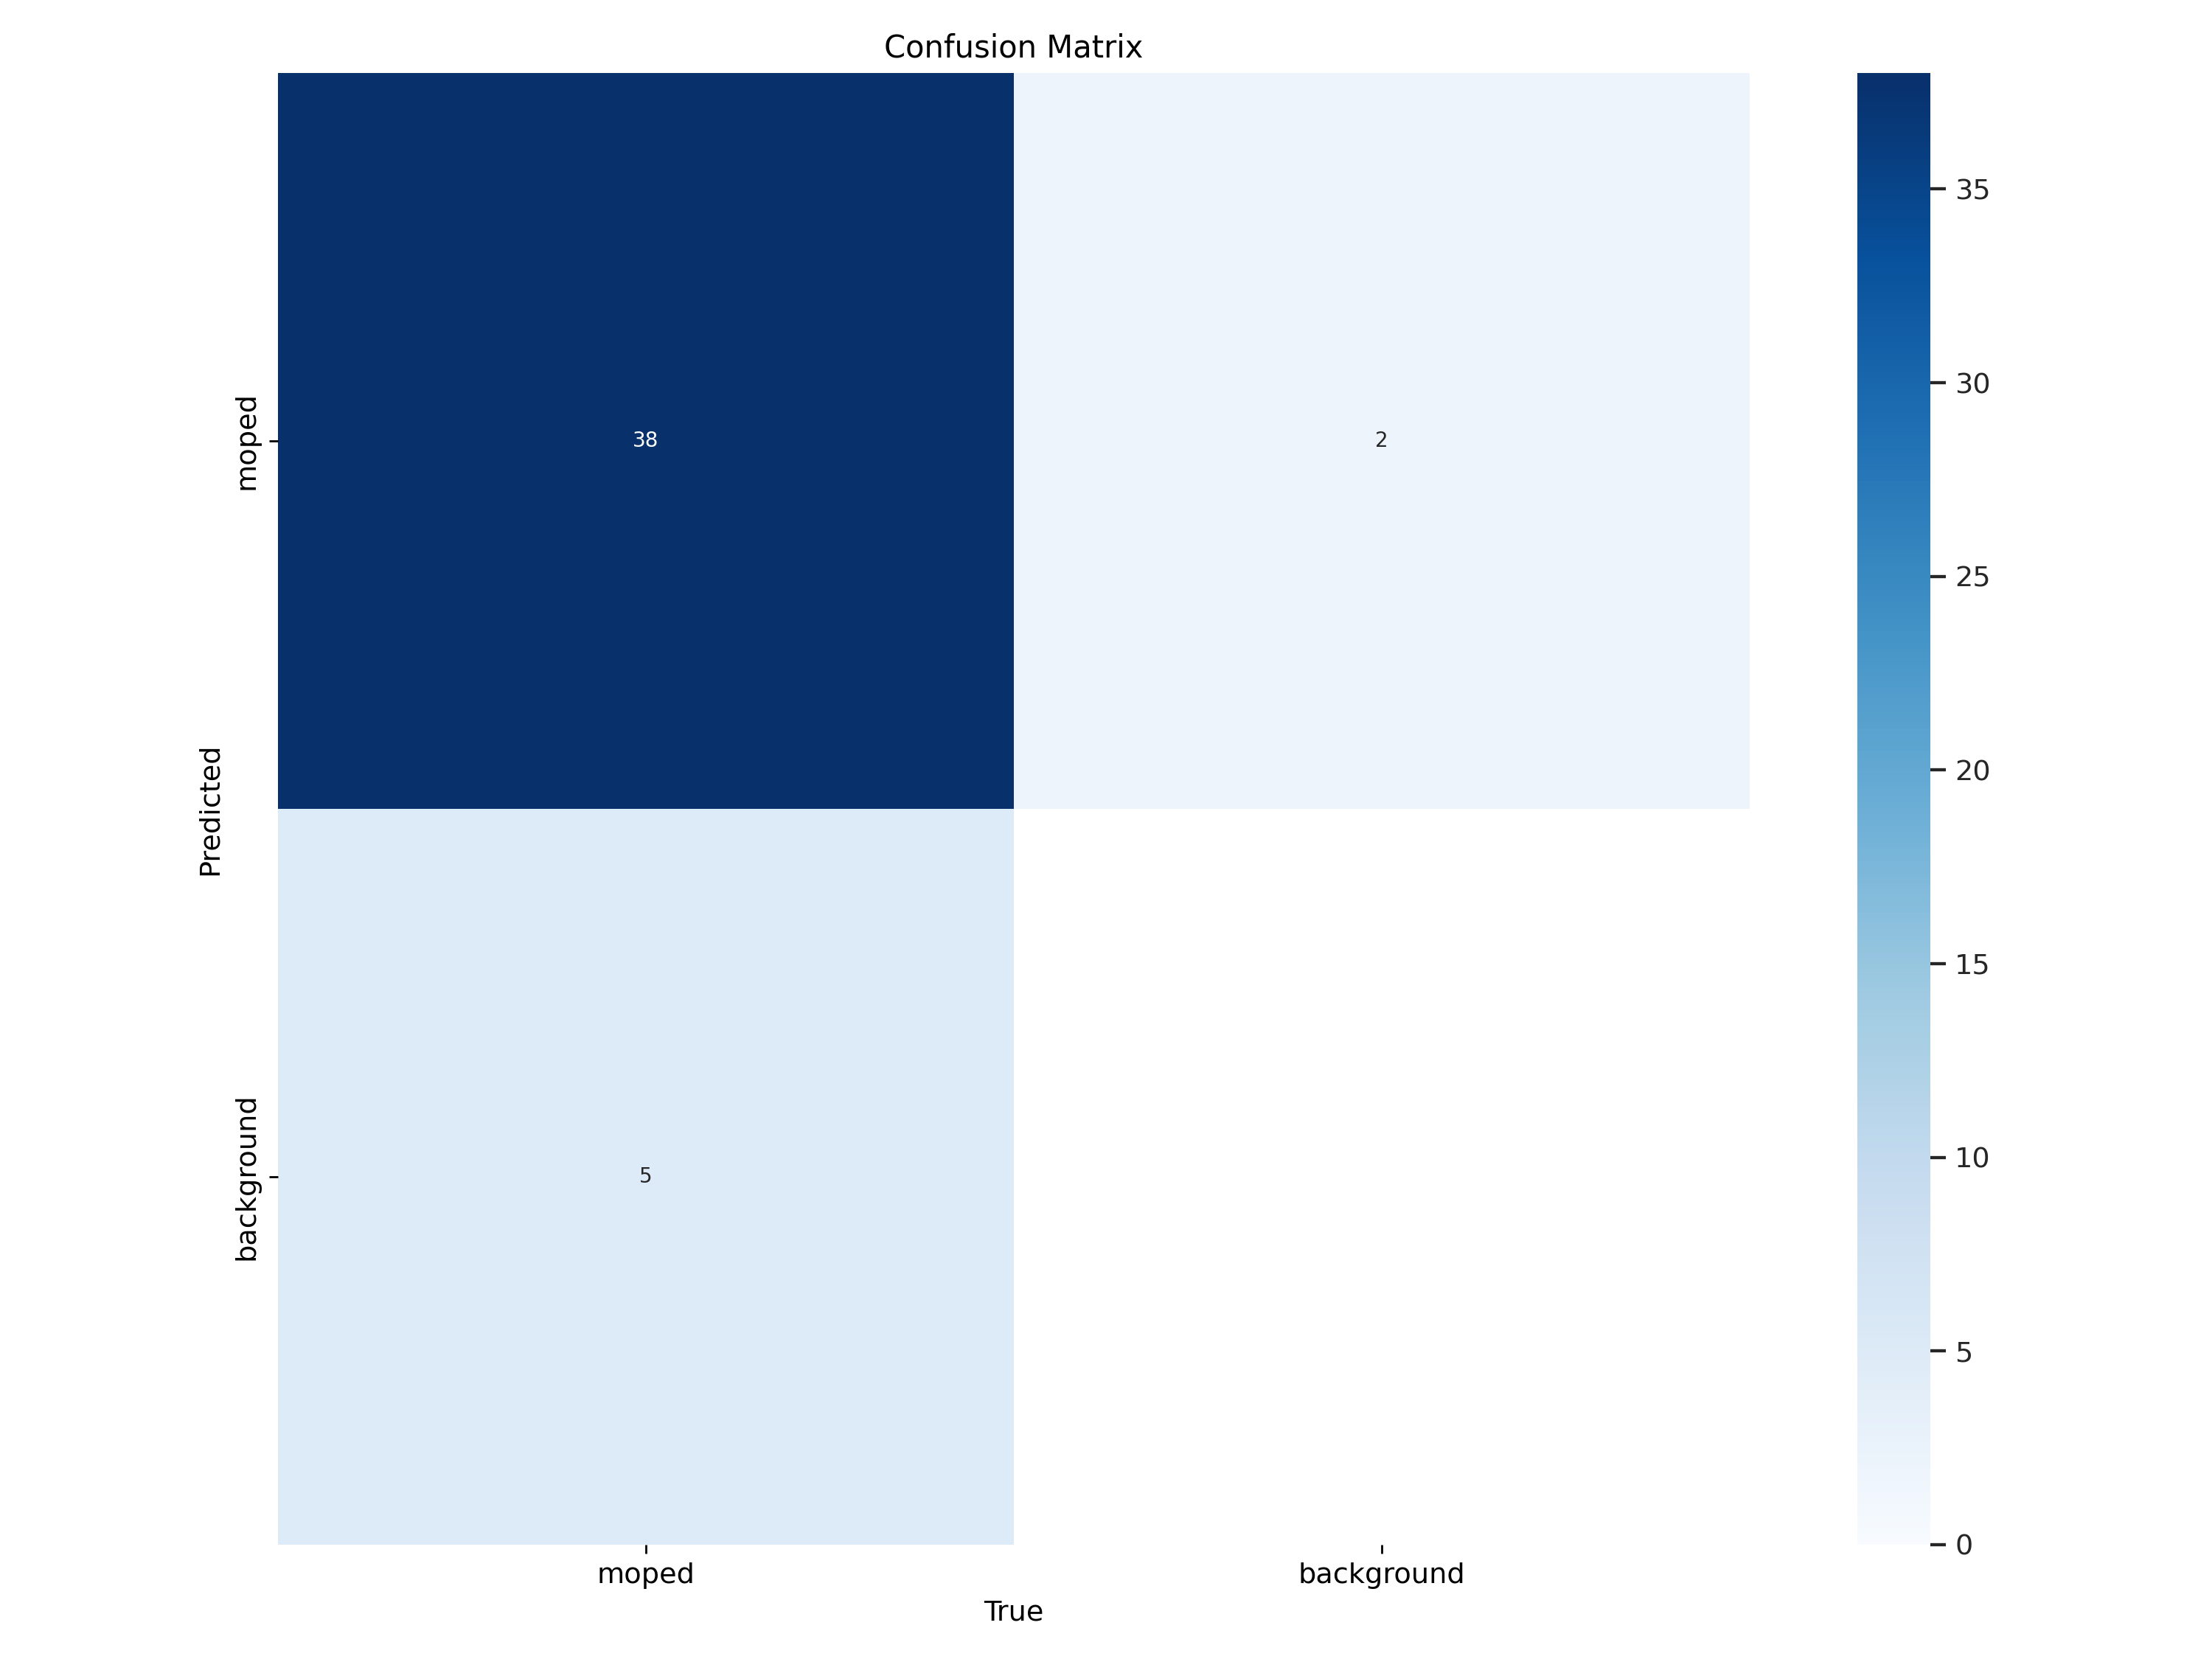

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

/content


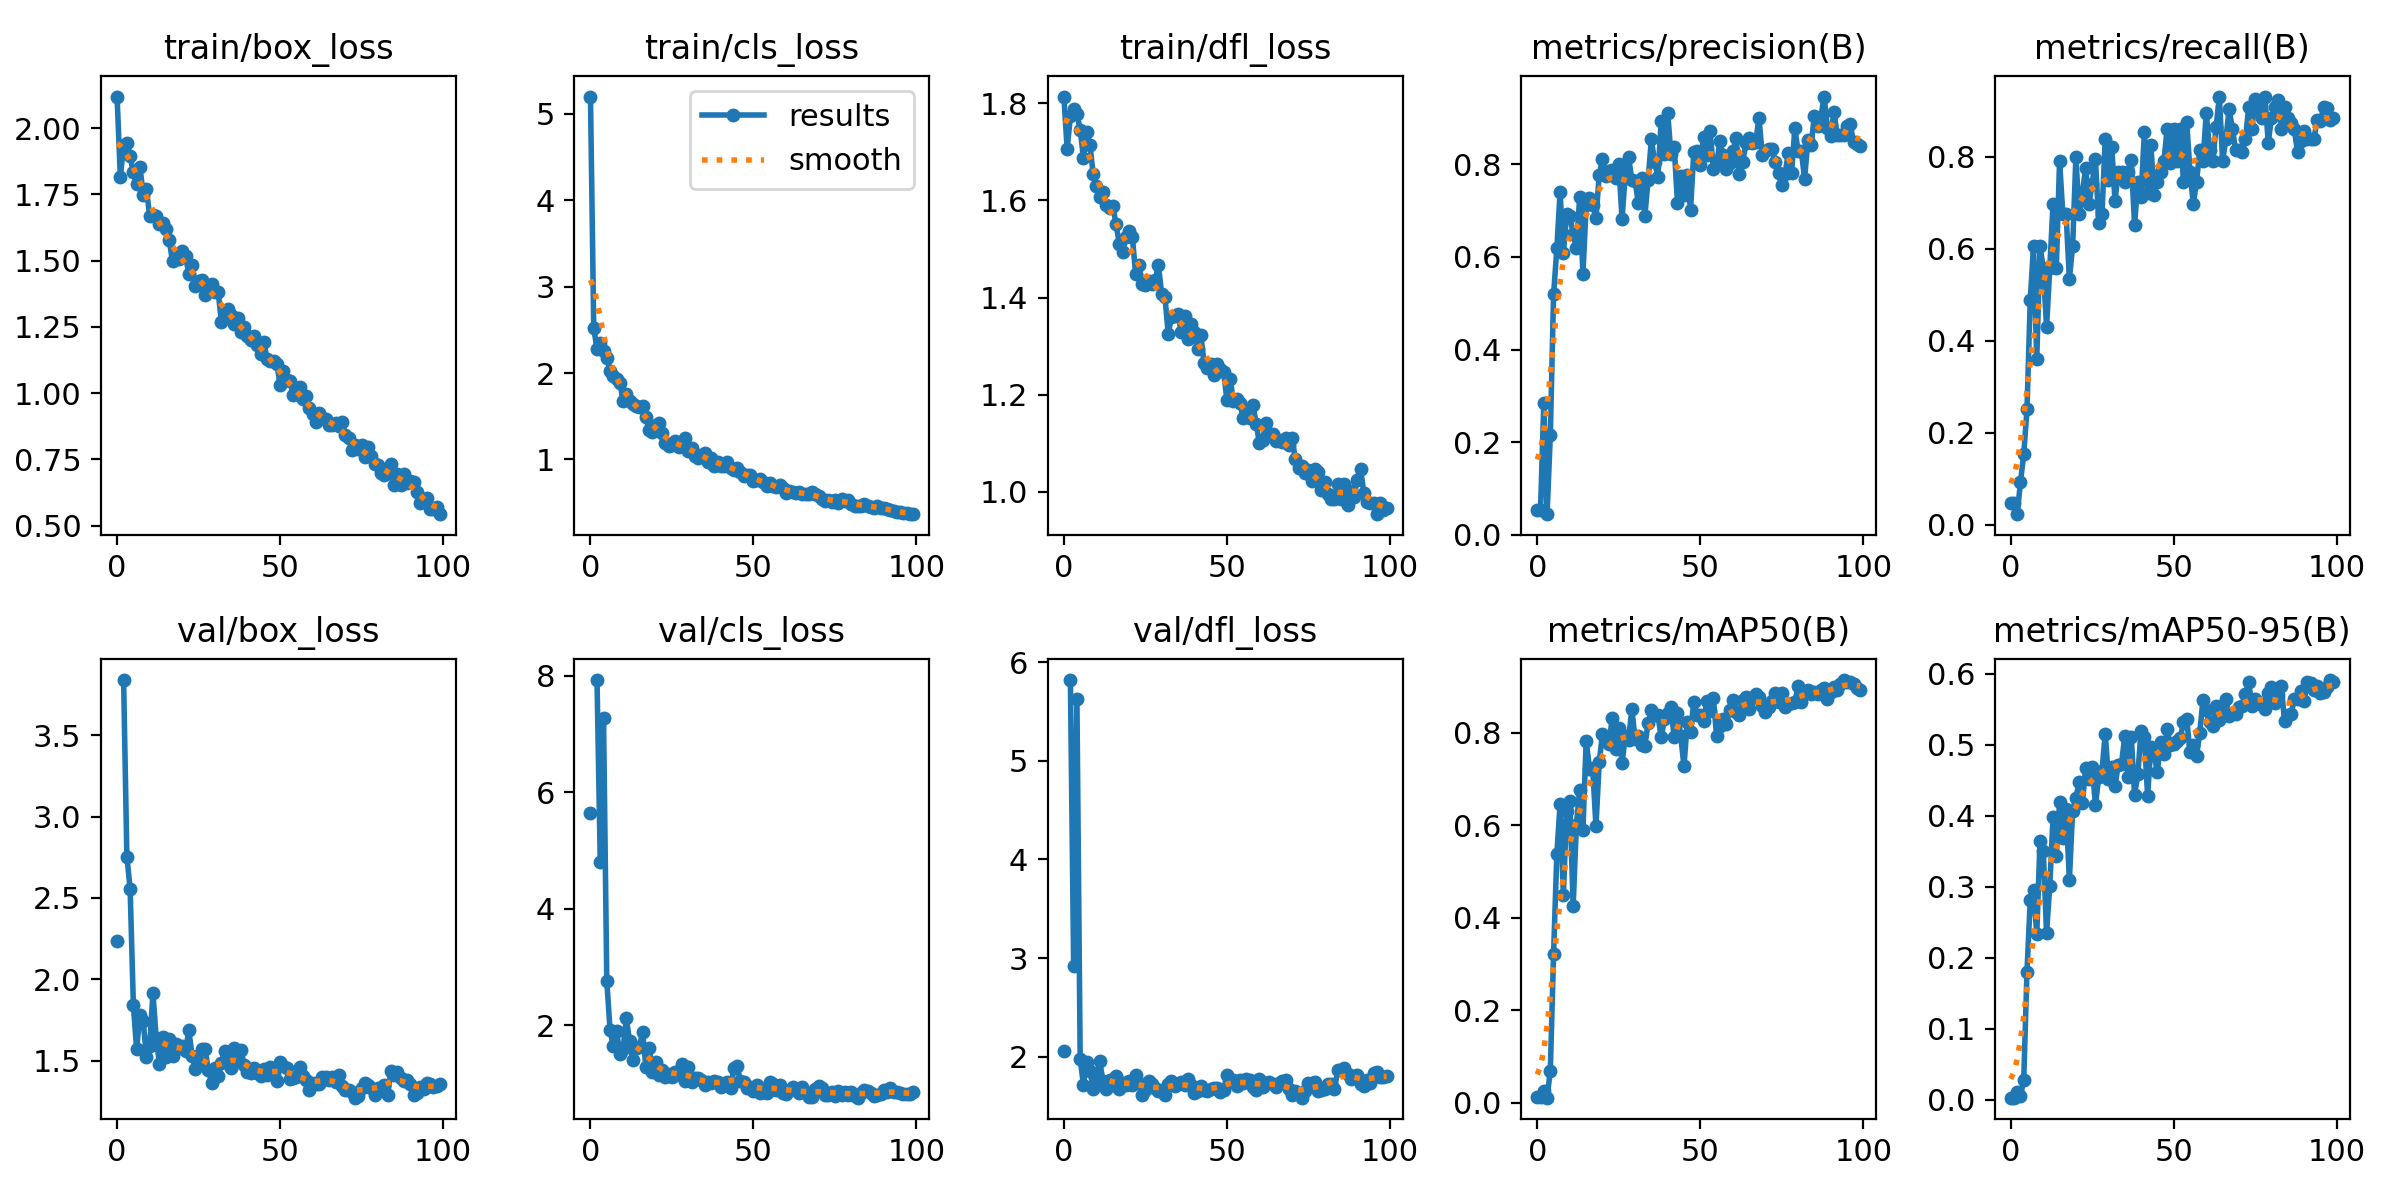

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

/content


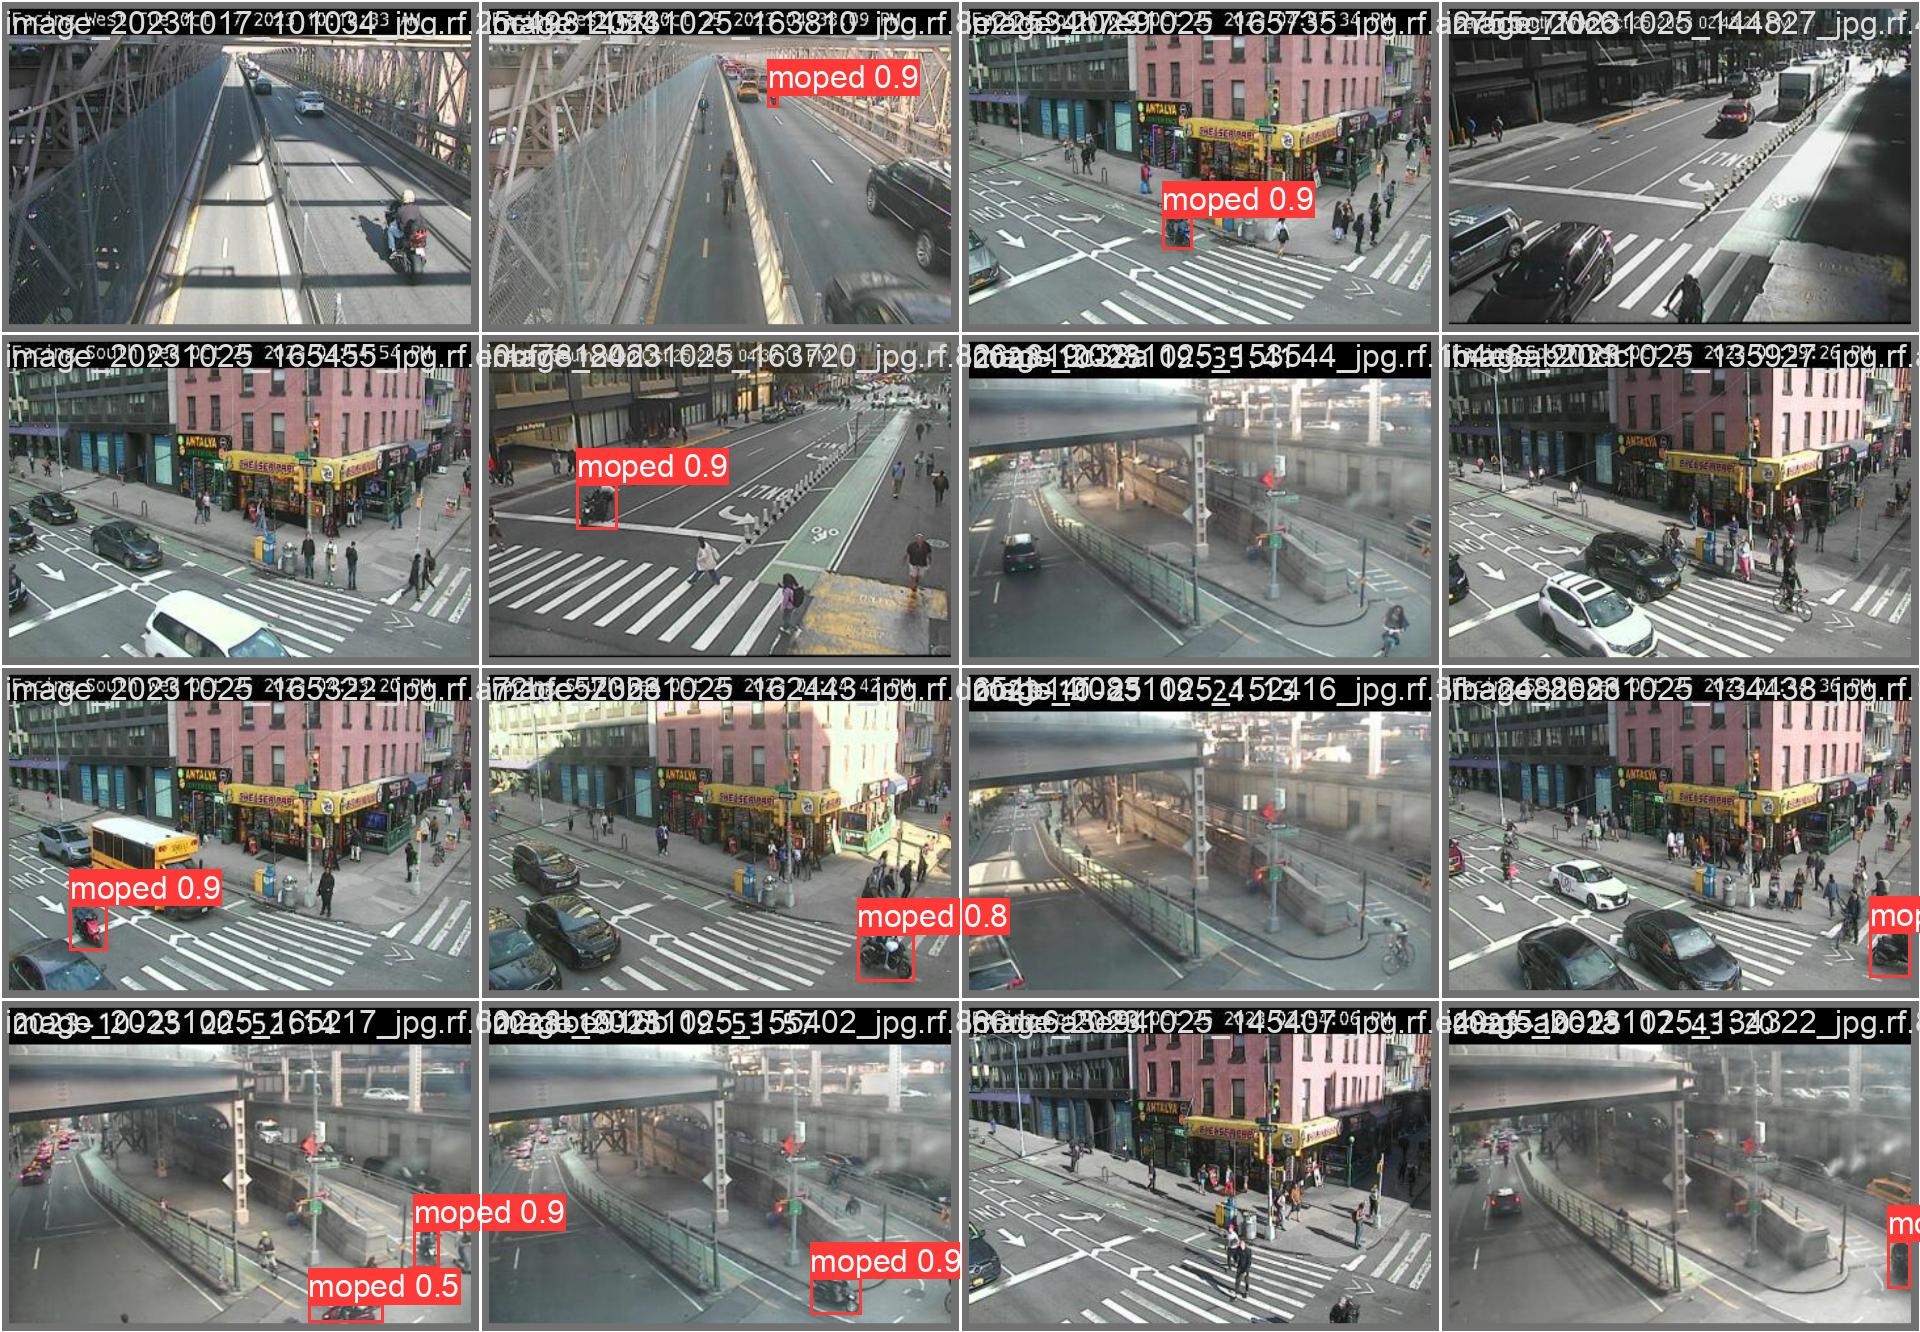

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-31 23:45:18.446940: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 23:45:18.447014: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 23:45:18.447057: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /content/datasets/mopeds-2/valid/labels.cache... 82 images, 41 backgrounds, 0 corrupt: 100% 82/82 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 10

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/infer/images save=True

/content
2023-10-31 17:12:09.904218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 17:12:09.904279: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 17:12:09.904331: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

image 1/601 /content/infer/images/image_20231031_094520.jpg: 576x800 (no detections), 107.0ms
image 2/601 /content/infer/images/image_20231031_094538.jpg: 576x800 (no detections), 35.5ms
image 3/6

In [ ]:
import zipfile

zip_file_paths = ['/content/BB25.zip', '/content/BB39.zip', '/content/BB44.zip', '/content/Queensboro_60thst.zip']

destination_folder = '/content/infer/'

for path in zip_file_paths:
  with zipfile.ZipFile(path, 'r') as zip_ref:
      zip_ref.extractall(destination_folder)

  print(f'Unzipped {path} to {destination_folder}')


Unzipped /content/BB25.zip to /content/infer/
Unzipped /content/BB39.zip to /content/infer/
Unzipped /content/BB44.zip to /content/infer/
Unzipped /content/Queensboro_60thst.zip to /content/infer/


In [ ]:
import subprocess
import shutil

cam_paths = ['/content/infer/BB25/', '/content/infer/BB39/', '/content/infer/BB44', '/content/infer/Queensboro_60thst']

current_directory = os.getcwd()
os.chdir(HOME)
predict_count = 1
for cam in cam_paths:

    command = f'yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.30 source={cam} save=True'
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    stdout, stderr = process.communicate()

    output_lines = stderr.splitlines()
    if predict_count == 1:
      source_directory = f'/content/runs/detect/predict'

    else:
      source_directory = f'/content/runs/detect/predict{predict_count}'
    destination_directory = '/content/results'
    predict_count += 1
    os.makedirs(destination_directory, exist_ok=True)

    for line in output_lines:
        if 'moped' in line:
            parts = line.split()

            image_path = parts[-5]
            image_name  = image_path.split('/')[-1][:-1]

            source_image_path = os.path.join(source_directory, image_name)
            destination_image_path = os.path.join(destination_directory, image_name)

            shutil.copy(source_image_path, destination_image_path)


shutil.make_archive("/content/results_oct_nov", 'zip', '/content/results')

from google.colab import files

file_path = "/content/results_oct_nov.zip"
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>